In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### 1. Data from video ####

In [16]:
data_file = "../lab_data/video_data/20230621.txt"
vid_data = np.loadtxt(data_file,unpack=True)
N = vid_data.shape[0]-1
tl, xl = np.vsplit(vid_data, [1])
tl = tl.reshape(-1)

poly_xl = [ np.polyfit(tl, x, 9) for x in xl ]
fxl = []
fxl.append(lambda t: np.polyval(poly_xl[0], t))
fxl.append(lambda t: np.polyval(poly_xl[1], t))

#for px in poly_xl:
#    print(px)
#    fxl.append(lambda t: np.polyval(px, t))
#fxl = [ lambda t: np.polyval(px, t) for px in poly_xl ]

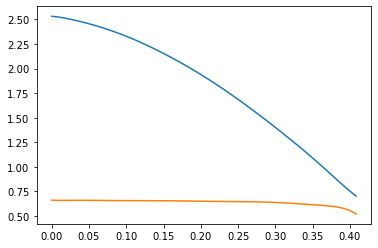

In [17]:
plt.plot(tl, fxl[0](tl), tl,fxl[1](tl));

#### 2. Numeric data ####

In [18]:
def rhs2(t, y, k, m, g, N):
    x, v = np.split(y, 2)
    xdot = v
    vdot = np.zeros_like(v)
    vdot[0] = -N*g + k/m * (x[1] - x[0])
    vdot[1:-1] = k/m * (x[2:] - 2*x[1:-1] + x[:-2])
    vdot[-1] = k/m * (x[-2] - x[-1])
    return np.hstack((xdot, vdot))

In [19]:
#Data from our springs and masses
L0 = 0.4639
KK = 0.4399
MM = 56.6E-3
g = 9.81

In [31]:
# Simple run
k = KK * (N - 1)
m = MM
x0 = np.zeros(N)
v0 = np.zeros(N)
y0 = np.hstack((x0, v0))
soluc = solve_ivp(rhs2, [0, 0.4], y0, args=[k, m, g, N], max_step=0.01)
tn = soluc.t
xn, vn = (np.vsplit(soluc.y, 2))
pxan = np.polyfit(tn, xn[0], 9)
pxbn = np.polyfit(tn, xn[1], 9)
fxn = [lambda t: np.polyval(pxan, t)]
fxn.append(lambda t: np.polyval(pxbn, t))

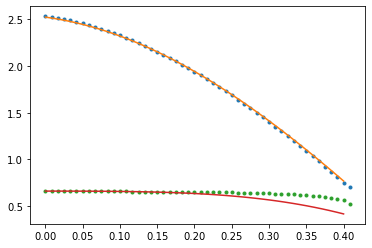

In [53]:
plt.plot(tl, xl[0],'.', 
         tn, xl[0,0]+0.02+fxn[0](tn+0.055),
         tl, xl[1], '.', 
         tn, xl[1,0]+fxn[1](tn+0.055));